<a href="https://colab.research.google.com/github/Max640a/ChyselniMetody_lab/blob/main/%D0%9B%D0%A07!_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%8E%D0%BA_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перша інтерполяційна формула Ньютона

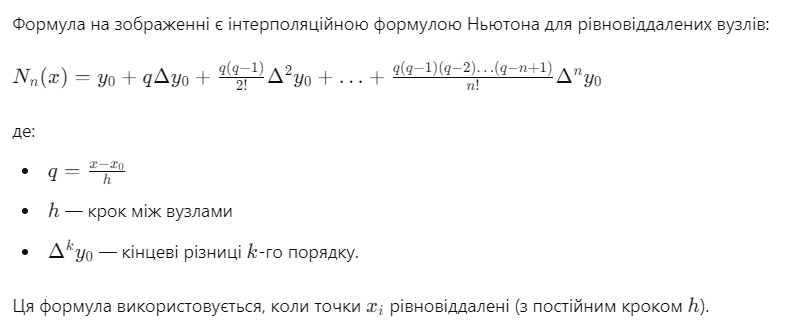

In [1]:
import numpy as np
from math import factorial

# --- ВАРІАНТ 4 ---
# Задані точки з Таблиці 4
x = np.array([0.180, 0.185, 0.190, 0.195, 0.200, 0.205, 0.210, 0.215, 0.220, 0.225, 0.230])
y = np.array([5.5154, 5.4669, 5.3263, 5.1930, 5.0664, 4.9461, 4.8317, 4.7226, 4.6185, 4.5191, 4.4242])

print('x =', x)
print('y =', y)

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*...
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.184 (Варіант 4, точка на початку)
x1 = 0.184
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x = [0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23 ]
y = [5.5154 5.4669 5.3263 5.193  5.0664 4.9461 4.8317 4.7226 4.6185 4.5191
 4.4242]
f(0.184) = 5.492499555681075


Друга інтерполяційна формула Ньютона (інтерполяція назад)

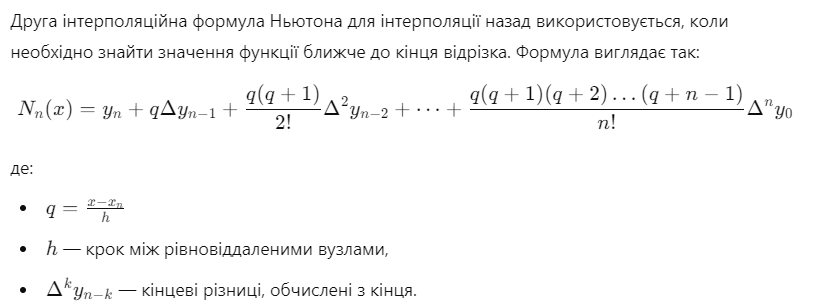

In [2]:
# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.221 Варіант 4, точка в кінці відрізка
x2 = 0.221
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")

f(0.221) = 4.598203735137074


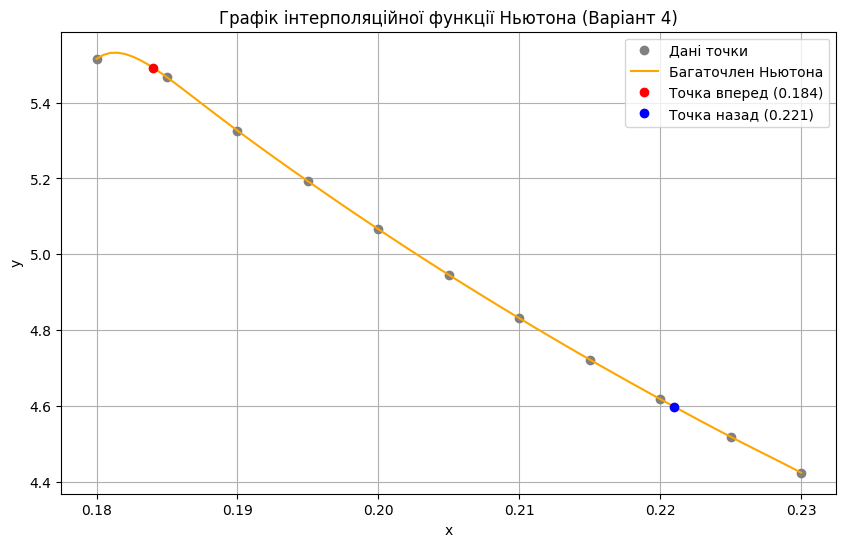

In [3]:
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)

for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    # Для першої половини графіку - інтерполяція вперед, для другої - назад
    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.figure(figsize=(10, 6)) # Збільшив розмір для зручності
plt.plot(x, y, 'o', label='Дані точки', color='gray')
plt.plot(xx, yy, label="Багаточлен Ньютона", color='orange')
plt.plot(x1, y1, 'ro', label=f'Точка вперед ({x1})')
plt.plot(x2, y2, 'bo', label=f'Точка назад ({x2})')

plt.title("Графік інтерполяційної функції Ньютона (Варіант 4)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()